In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [4]:
def encodage(df):
    code = {"AAA" : 10,
            "AA" : 9,
            "A" : 8,
            "BBB" : 7,
            "BB" : 6,
            "B" : 5,
            "CCC" : 4,
            "CC" : 3,
            "C" : 2}
    if "Credit Rating" in df.columns:
        df["Credit Rating"] = df["Credit Rating"].map(code)     
    return df

def features(df):
    df['Profitability_Ratio'] = pd.to_numeric(df['Profit']) / pd.to_numeric(df['Revenue'])
    df["Profit_per_employee"] = df["Profit"]/df["Employee Count"]
    df["RnD_Spend_to_revenue"] = df["Research and Development Spend"]/pd.to_numeric(df["Revenue"])
    df["Earnings_to_Market_Cap"] = df["Profit"]/df["Market Capitalization"]
    return df


def processing(df):
    df = encodage(df)
    X = df.drop("Risk", axis=1)
    y = df["Risk"]
    return X, y

def make_predictions(input_data, model, X_train, y_train, encoder=None, scaler=None):
    input_data_copy = input_data.copy()
    if encoder:
        input_data_copy = encoder(input_data_copy)
    feature_names = X_train.columns.tolist()
    X_input = input_data_copy[feature_names]
    if scaler:
        X_input = scaler.transform(X_input)
    predictions = model.predict(X_input)
    input_data_copy["Risk"] = predictions
    return input_data_copy

In [5]:
data = pd.read_csv("training_dataset.csv")
data.head()

,Company ID,Revenue,Employee Count,Credit Rating,Risk,Expenses,Research and Development Spend,Profit,Debt-to-Equity Ratio,Price-to-Earnings Ratio,Market Capitalization
0,1050,108.507764,5695,B,1,13.614721,33.490353,94.893043,1.745759,20.659128,2159.665865
1,303,316.254049,5490,B,0,235.302857,16.271908,80.951192,0.724783,27.421956,1828.014221
2,4253,235.722107,8164,BBB,1,195.839247,6.210687,39.882860,1.481972,8.830808,354.006752
3,1584,298.706744,9295,A,0,271.777163,6.333781,26.929581,1.685455,26.695698,598.612673
4,379,425.787393,1431,BBB,0,340.989094,28.933570,84.798299,1.731434,16.101618,1602.984505


In [6]:
X, y = processing(data)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
gnb = GaussianNB(var_smoothing=1e-11)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=1e-11)

In [70]:
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       876
           1       0.00      0.00      0.00       324

    accuracy                           0.73      1200
   macro avg       0.36      0.50      0.42      1200
weighted avg       0.53      0.73      0.62      1200



c:\Users\mpmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mpmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mpmol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [40]:
import xgboost as xgb


In [41]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', 
                              eval_metric="logloss")

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.6875
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.93      0.81       557
           1       0.45      0.13      0.20       243

    accuracy                           0.69       800
   macro avg       0.58      0.53      0.50       800
weighted avg       0.63      0.69      0.62       800



In [42]:
import lightgbm as lgb

In [43]:
lgb_model = lgb.LGBMClassifier(objective='binary', 
                               metric='binary_logloss', 
                               random_state=42,
                               n_estimators=250,
                               class_weight={0:0.5, 1:1},
                               learning_rate=0.2)
                               

lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Accuracy (après optimisation) : {accuracy_lgb}")
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 809, number of negative: 2391
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2303
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.403592 -> initscore=-0.390521
[LightGBM] [Info] Start training from score -0.390521
LightGBM Accuracy (après optimisation) : 0.67625
LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79       557
           1       0.42      0.18      0.25       243

    accuracy                           0.68       800
   macro avg       0.57      0.54      0.52       800
weighted avg       0.63      0.68      0.63       800



In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

In [31]:
base_model = RandomForestClassifier(bootstrap=True,
                                      class_weight={0:1, 1:3},
                                      max_depth=2,
                                      min_samples_leaf=1,
                                      min_samples_split=10,
                                      n_estimators=50)

adaboost_model = AdaBoostClassifier(base_model, random_state=0, algorithm="SAMME.R", learning_rate=0.2)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.2, 0.3],
}
precision_scorer = make_scorer(precision_score, average='weighted')

grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, scoring=precision_scorer, cv=3)
grid_search.fit(X_train, y_train)

print("Meilleurs hyperparamètres :", grid_search.best_params_)

best_adaboost_model = grid_search.best_estimator_

y_pred_adaboost = best_adaboost_model.predict(X_test)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
print(f"AdaBoost Precision: {precision_adaboost}")
print("AdaBoost Classification Report:\n", classification_report(y_test, y_pred_adaboost))

Meilleurs hyperparamètres : {'learning_rate': 0.1, 'n_estimators': 50}
AdaBoost Precision: 0.6177542293233083
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.55      0.63       557
           1       0.35      0.54      0.42       243

    accuracy                           0.55       800
   macro avg       0.54      0.55      0.53       800
weighted avg       0.62      0.55      0.57       800



In [73]:
random_forest_model = RandomForestClassifier(n_estimators=75, random_state=0, class_weight={0:1, 1:3}, max_depth=3)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print(f"Random Forest Accuracy: {accuracy_random_forest}")
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_random_forest))

Random Forest Accuracy: 0.5325
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.53      0.62       876
           1       0.30      0.53      0.38       324

    accuracy                           0.53      1200
   macro avg       0.53      0.53      0.50      1200
weighted avg       0.63      0.53      0.56      1200



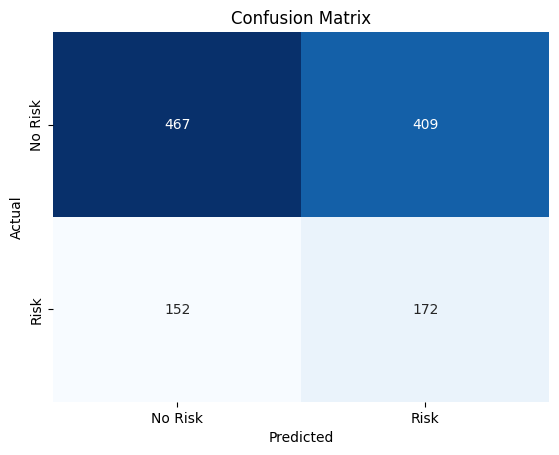

In [74]:
cm = confusion_matrix(y_test, y_pred_random_forest)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [76]:
random_forest_model_2 = RandomForestClassifier(n_estimators=100, random_state=0)
cv_scores = cross_val_score(random_forest_model, X, y, cv=5, scoring='accuracy')
print("Scores de la validation croisée :", cv_scores)
mean_accuracy = cv_scores.mean()
print("Moyenne des scores :", mean_accuracy)


Scores de la validation croisée : [0.47    0.495   0.47625 0.4925  0.48625]
Moyenne des scores : 0.484


In [12]:
from sklearn.neural_network import MLPClassifier

In [155]:
model = MLPClassifier(hidden_layer_sizes=(12,5), 
                      max_iter=1000, 
                      random_state=42,
                      activation="relu",
                      solver="adam",
                      alpha=0.0001,
                      learning_rate="constant")
model.fit(X_train, y_train)
y_pred_3 = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_3)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred_3))

Accuracy: 0.70625
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.96      0.83       581
           1       0.25      0.04      0.06       219

    accuracy                           0.71       800
   macro avg       0.49      0.50      0.44       800
weighted avg       0.60      0.71      0.62       800



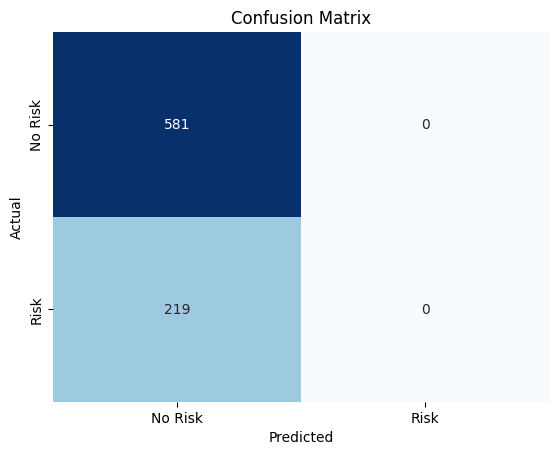

In [150]:
cm_2 = confusion_matrix(y_test, y_pred_3)

sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [1]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [32]:
model = MLPClassifier(hidden_layer_sizes=(500,250,100), 
                      max_iter=1000, 
                      random_state=42,
                      activation="relu",
                      solver="adam",
                      alpha=0.000001,
                      learning_rate="adaptive")
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.39      0.51       581
           1       0.28      0.63      0.39       219

    accuracy                           0.45       800
   macro avg       0.51      0.51      0.45       800
weighted avg       0.61      0.45      0.47       800

